In [97]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

from wrangle import get_beer, split_data, review_categorizer, wrangle_beer, find_lager



ImportError: cannot import name 'split_data' from 'wrangle' (/Users/derekbixby/codeup-data-science/beer_project/wrangle.py)

# Acquire

In [2]:
df = get_beer()

In [3]:
df.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


# Prepare

In [5]:
df.beer_style.nunique()

104

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1586614 entries, 0 to 1586613
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   brewery_id          1586614 non-null  int64  
 1   brewery_name        1586599 non-null  object 
 2   review_time         1586614 non-null  int64  
 3   review_overall      1586614 non-null  float64
 4   review_aroma        1586614 non-null  float64
 5   review_appearance   1586614 non-null  float64
 6   review_profilename  1586266 non-null  object 
 7   beer_style          1586614 non-null  object 
 8   review_palate       1586614 non-null  float64
 9   review_taste        1586614 non-null  float64
 10  beer_name           1586614 non-null  object 
 11  beer_abv            1518829 non-null  float64
 12  beer_beerid         1586614 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 169.5+ MB


In [7]:
df.describe()

,brewery_id,review_time,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid
count,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.518829e+06,1.586614e+06
mean,3.130099e+03,1.224089e+09,3.815581e+00,3.735636e+00,3.841642e+00,3.743701e+00,3.792860e+00,7.042387e+00,2.171279e+04
std,5.578104e+03,7.654427e+07,7.206219e-01,6.976167e-01,6.160928e-01,6.822184e-01,7.319696e-01,2.322526e+00,2.181834e+04
min,1.000000e+00,8.406720e+08,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e-02,3.000000e+00
25%,1.430000e+02,1.173224e+09,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,5.200000e+00,1.717000e+03
50%,4.290000e+02,1.239203e+09,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,6.500000e+00,1.390600e+04
75%,2.372000e+03,1.288568e+09,4.500000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.500000e+00,8.500000e+00,3.944100e+04
max,2.800300e+04,1.326285e+09,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.770000e+01,7.731700e+04


In [8]:
df.beer_abv.isnull().sum()

67785

In [12]:
# dropped columns that contained nulls and were not likely useful

df = df.drop(columns=['review_profilename', 'brewery_name', 'brewery_id', 'review_time'], axis=1)

In [13]:
df.head()

,brewery_id,review_time,review_overall,review_aroma,review_appearance,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,1234817823,1.5,2.0,2.5,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,1235915097,3.0,2.5,3.0,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,1235916604,3.0,2.5,3.0,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,1234725145,3.0,3.0,3.5,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,1293735206,4.0,4.5,4.0,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


In [15]:
df.beer_style.unique()

array(['Hefeweizen', 'English Strong Ale', 'Foreign / Export Stout',
       'German Pilsener', 'American Double / Imperial IPA',
       'Herbed / Spiced Beer', 'Light Lager', 'Oatmeal Stout',
       'American Pale Lager', 'Rauchbier', 'American Pale Ale (APA)',
       'American Porter', 'Belgian Strong Dark Ale', 'American IPA',
       'American Stout', 'Russian Imperial Stout',
       'American Amber / Red Ale', 'American Strong Ale',
       'Märzen / Oktoberfest', 'American Adjunct Lager',
       'American Blonde Ale', 'Euro Pale Lager', 'English Brown Ale',
       'Scotch Ale / Wee Heavy', 'Fruit / Vegetable Beer',
       'American Double / Imperial Stout', 'Belgian Pale Ale',
       'English Bitter', 'English Porter', 'Irish Dry Stout',
       'American Barleywine', 'Belgian Strong Pale Ale', 'Doppelbock',
       'Maibock / Helles Bock', 'Pumpkin Ale',
       'Dortmunder / Export Lager', 'Euro Strong Lager',
       'Euro Dark Lager', 'Low Alcohol Beer', 'Weizenbock',
       'Extra 

In [16]:
# using domain knowledge and information from total wine, utilized beer type 
# column to determine if each beer type is an ale or lager

def find_lager(row):
    if row['beer_style'] == "Hefeweizen":
        val = 0
    elif row['beer_style']  == 'English Strong Ale':
        val = 0
    elif row['beer_style']  == 'Foreign / Export Stout':
        val = 0
    elif row['beer_style']  == 'American Double / Imperial IPA':
        val = 0
    elif row['beer_style']  == 'Herbed / Spiced Beer':
        val = 0
    elif row['beer_style']  == 'Oatmeal Stout':
        val = 0
    elif row['beer_style']  == 'American Pale Ale (APA)':
        val = 0
    elif row['beer_style']  == 'American Porter':
        val = 0
    elif row['beer_style']  == 'Belgian Strong Dark Ale':
        val = 0
    elif row['beer_style']  == 'American IPA':
        val = 0
    elif row['beer_style']  == 'American Stout':
        val = 0
    elif row['beer_style']  == 'Russian Imperial Stout':
        val = 0
    elif row['beer_style']  == 'American Blonde Ale':
        val = 0
    elif row['beer_style']  == 'English Brown Ale':
        val = 0
    elif row['beer_style']  == 'Scotch Ale / Wee Heavy':
        val = 0
    elif row['beer_style']  == 'Fruit / Vegetable Beer':
        val = 0
    elif row['beer_style']  == 'American Double / Imperial Stout':
        val = 0
    elif row['beer_style']  == 'Belgian Pale Ale':
        val = 0
    elif row['beer_style']  == 'English Bitter':
        val = 0
    elif row['beer_style']  == 'English Porter':
        val = 0
    elif row['beer_style']  == 'American Barleywine':
        val = 0
    elif row['beer_style']  == 'Belgian Strong Pale Ale':
        val = 0
    elif row['beer_style']  == 'Pumpkin Ale':
        val = 0
    elif row['beer_style']  == 'Extra Special / Strong Bitter (ESB)':
        val = 0
    elif row['beer_style']  == 'English India Pale Ale (IPA)':
        val = 0
    elif row['beer_style']  == 'Kölsch':
        val = 0
    elif row['beer_style']  == 'Rye Beer':
        val = 0
    elif row['beer_style']  == 'American Pale Wheat Ale':
        val = 0
    elif row['beer_style']  == 'Milk / Sweet Stout':
        val = 0
    elif row['beer_style']  == 'Scottish Ale':
        val = 0
    elif row['beer_style']  == 'Witbier':
        val = 0
    elif row['beer_style']  == 'American Black Ale':
        val = 0
    elif row['beer_style']  == 'Saison / Farmhouse Ale':
        val = 0
    elif row['beer_style']  == 'Irish Dry Stout':
        val = 0
    elif row['beer_style']  == 'English Barleywine':
        val = 0
    elif row['beer_style']  == 'English Dark Mild Ale':
        val = 0
    elif row['beer_style']  == 'English Pale Ale':
        val = 0
    elif row['beer_style']  == 'Belgian IPA':
        val = 0
    elif row['beer_style']  == 'Tripel':
        val = 0
    elif row['beer_style']  == 'Flanders Oud Bruin':
        val = 0
    elif row['beer_style']  == 'American Brown Ale':
        val = 0
    elif row['beer_style']  == 'Winter Warmer':
        val = 0
    elif row['beer_style']  == 'Smoked Beer':
        val = 0
    elif row['beer_style']  == 'Dubbel':
        val = 0
    elif row['beer_style']  == 'Flanders Red Ale':
        val = 0
    elif row['beer_style']  == 'Dunkelweizen':
        val = 0
    elif row['beer_style']  == 'Belgian Dark Ale':
        val = 0
    elif row['beer_style']  == 'Bière de Garde':
        val = 0
    elif row['beer_style']  == 'Irish Red Ale':
        val = 0
    elif row['beer_style']  == 'English Stout':
        val = 0
    elif row['beer_style']  == 'Cream Ale':
        val = 0
    elif row['beer_style']  == 'American Wild Ale':
        val = 0
    elif row['beer_style']  == 'Scottish Gruit / Ancient Herbed Ale':
        val = 0
    elif row['beer_style']  == 'Wheatwine':
        val = 0
    elif row['beer_style']  == 'American Dark Wheat Ale':
        val = 0
    elif row['beer_style']  == 'Baltic Porter':
        val = 0
    elif row['beer_style']  == 'Kristalweizen':
        val = 0
    elif row['beer_style']  == 'English Pale Mild Ale':
        val = 0
    elif row['beer_style']  == 'Lambic - Fruit':
        val = 0
    elif row['beer_style']  == 'Quadrupel (Quad)':
        val = 0
    elif row['beer_style']  == 'Braggot':
        val = 0
    elif row['beer_style']  == 'Lambic - Unblended':
        val = 0
    elif row['beer_style']  == 'Berliner Weissbier':
        val = 0
    elif row['beer_style']  == 'Lambic - Fruit':
        val = 0
    elif row['beer_style']  == 'Kvass':
        val = 0
    elif row['beer_style']  == 'Lambic - Fruit':
        val = 0
    elif row['beer_style']  == 'Faro':
        val = 0
    elif row['beer_style']  == 'Gueuze':
        val = 0
    elif row['beer_style']  == 'Gose':
        val = 0
    elif row['beer_style']  == 'Sahti':
        val = 0
    elif row['beer_style']  == 'Bière de Champagne / Bière Brut':
        val = 0
    else:
        val = 1
    return val

df['is_lager'] = df.apply(find_lager, axis=1)
df.head()

,brewery_id,review_time,review_overall,review_aroma,review_appearance,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid,is_lager
0,10325,1234817823,1.5,2.0,2.5,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986,0
1,10325,1235915097,3.0,2.5,3.0,English Strong Ale,3.0,3.0,Red Moon,6.2,48213,0
2,10325,1235916604,3.0,2.5,3.0,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215,0
3,10325,1234725145,3.0,3.0,3.5,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969,1
4,1075,1293735206,4.0,4.5,4.0,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883,0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1586614 entries, 0 to 1586613
Data columns (total 12 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   brewery_id         1586614 non-null  int64  
 1   review_time        1586614 non-null  int64  
 2   review_overall     1586614 non-null  float64
 3   review_aroma       1586614 non-null  float64
 4   review_appearance  1586614 non-null  float64
 5   beer_style         1586614 non-null  object 
 6   review_palate      1586614 non-null  float64
 7   review_taste       1586614 non-null  float64
 8   beer_name          1586614 non-null  object 
 9   beer_abv           1518829 non-null  float64
 10  beer_beerid        1586614 non-null  int64  
 11  is_lager           1586614 non-null  int64  
dtypes: float64(6), int64(4), object(2)
memory usage: 157.4+ MB


In [31]:
# filled missing abv values with mode abv. alcohol.org and other websites say 5% is average, mode is exactly 5%
# 67785 missing values in abv filled with mode
mean_value=df['beer_abv'].mode()

df['beer_abv'].fillna(value=mean_value, inplace=True)
df.head()

,brewery_id,review_time,review_overall,review_aroma,review_appearance,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid,is_lager
0,10325,1234817823,1.5,2.0,2.5,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986,0
1,10325,1235915097,3.0,2.5,3.0,English Strong Ale,3.0,3.0,Red Moon,6.2,48213,0
2,10325,1235916604,3.0,2.5,3.0,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215,0
3,10325,1234725145,3.0,3.0,3.5,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969,1
4,1075,1293735206,4.0,4.5,4.0,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883,0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1586614 entries, 0 to 1586613
Data columns (total 12 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   brewery_id         1586614 non-null  int64  
 1   review_time        1586614 non-null  int64  
 2   review_overall     1586614 non-null  float64
 3   review_aroma       1586614 non-null  float64
 4   review_appearance  1586614 non-null  float64
 5   beer_style         1586614 non-null  object 
 6   review_palate      1586614 non-null  float64
 7   review_taste       1586614 non-null  float64
 8   beer_name          1586614 non-null  object 
 9   beer_abv           1586614 non-null  float64
 10  beer_beerid        1586614 non-null  int64  
 11  is_lager           1586614 non-null  int64  
dtypes: float64(6), int64(4), object(2)
memory usage: 157.4+ MB


In [34]:
df[df.review_overall < 1].shape

(7, 12)

In [36]:
df.shape

(1586614, 12)

In [37]:
df = df.drop(columns=['brewery_id', 'review_time'], axis=1)

In [39]:
def review_categorizer(row):
    if row['review_overall'] <= 1:
        val = 1
    elif row['review_overall']  <= 2:
        val = 2
    elif row['review_overall']  <= 3:
        val = 3
    elif row['review_overall']  <= 4:
        val = 4
    else:
        val = 5
    return val

df['review_cat'] = df.apply(review_categorizer, axis=1)

In [40]:
df.head()

,review_overall,review_aroma,review_appearance,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid,is_lager,review_cat
0,1.5,2.0,2.5,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986,0,2
1,3.0,2.5,3.0,English Strong Ale,3.0,3.0,Red Moon,6.2,48213,0,3
2,3.0,2.5,3.0,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215,0,3
3,3.0,3.0,3.5,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969,1,3
4,4.0,4.5,4.0,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883,0,4


In [41]:
def split_data(df, test_size=.2, validate_size=.25, col_to_stratify=None, random_state=7):
    '''
    This splits data into test,train and validate data
    '''
    # This takes in a default variable or a variable to determine target variable for stratification
    if col_to_stratify == None:
    # this splits the data
        train_validate, test = train_test_split(df, test_size=test_size, random_state=random_state)
        train, validate = train_test_split(train_validate,
                                       test_size=validate_size,
                                       random_state=random_state,)
    else:                                                        
        train_validate, test = train_test_split(df, test_size=test_size, random_state=random_state, stratify=df[col_to_stratify])
        train, validate = train_test_split(train_validate,
                                       test_size=validate_size,
                                       random_state=random_state,
                                       stratify=train_validate[col_to_stratify])
    return train, validate, test


In [48]:
train, validate, test = split_data(df, col_to_stratify='review_cat')
train.head()

,review_overall,review_aroma,review_appearance,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid,is_lager,review_cat
205023,4.5,4.5,4.5,Flanders Red Ale,4.5,4.5,La Folie,6.0,1917,0,5
903828,5.0,4.0,4.5,Hefeweizen,4.0,5.0,Franziskaner Hefe-Weisse,5.0,1946,0,5
540460,4.5,4.0,4.0,American Double / Imperial IPA,4.5,4.0,Terrapin Rye Squared,8.5,22042,0,5
484475,4.5,4.5,4.0,Lambic - Fruit,4.0,5.0,Cantillon Lou Pepe - Kriek,5.0,3659,0,5
1269949,5.0,4.0,4.0,English Pale Ale,4.0,5.0,Old Speckled Hen,5.2,637,0,5


In [49]:
train.shape

(951968, 11)

In [50]:
validate.shape

(317323, 11)

In [51]:
test.shape

(317323, 11)

# Explore

### Target and overall data

In [52]:
train.describe()

,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid,is_lager,review_cat
count,951968.000000,951968.000000,951968.000000,951968.000000,951968.000000,951968.000000,951968.000000,951968.000000,951968.000000
mean,3.815574,3.735688,3.841943,3.743592,3.792812,7.043894,21731.495917,0.233134,4.035455
std,0.720568,0.697093,0.615725,0.682042,0.731629,2.274010,21819.764239,0.422827,0.770258
min,0.000000,1.000000,0.000000,1.000000,1.000000,0.010000,3.000000,0.000000,1.000000
25%,3.500000,3.500000,3.500000,3.500000,3.500000,5.300000,1720.000000,0.000000,4.000000
50%,4.000000,4.000000,4.000000,4.000000,4.000000,6.600000,13954.000000,0.000000,4.000000
75%,4.500000,4.000000,4.000000,4.000000,4.500000,8.400000,39497.000000,0.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,57.700000,77317.000000,1.000000,5.000000


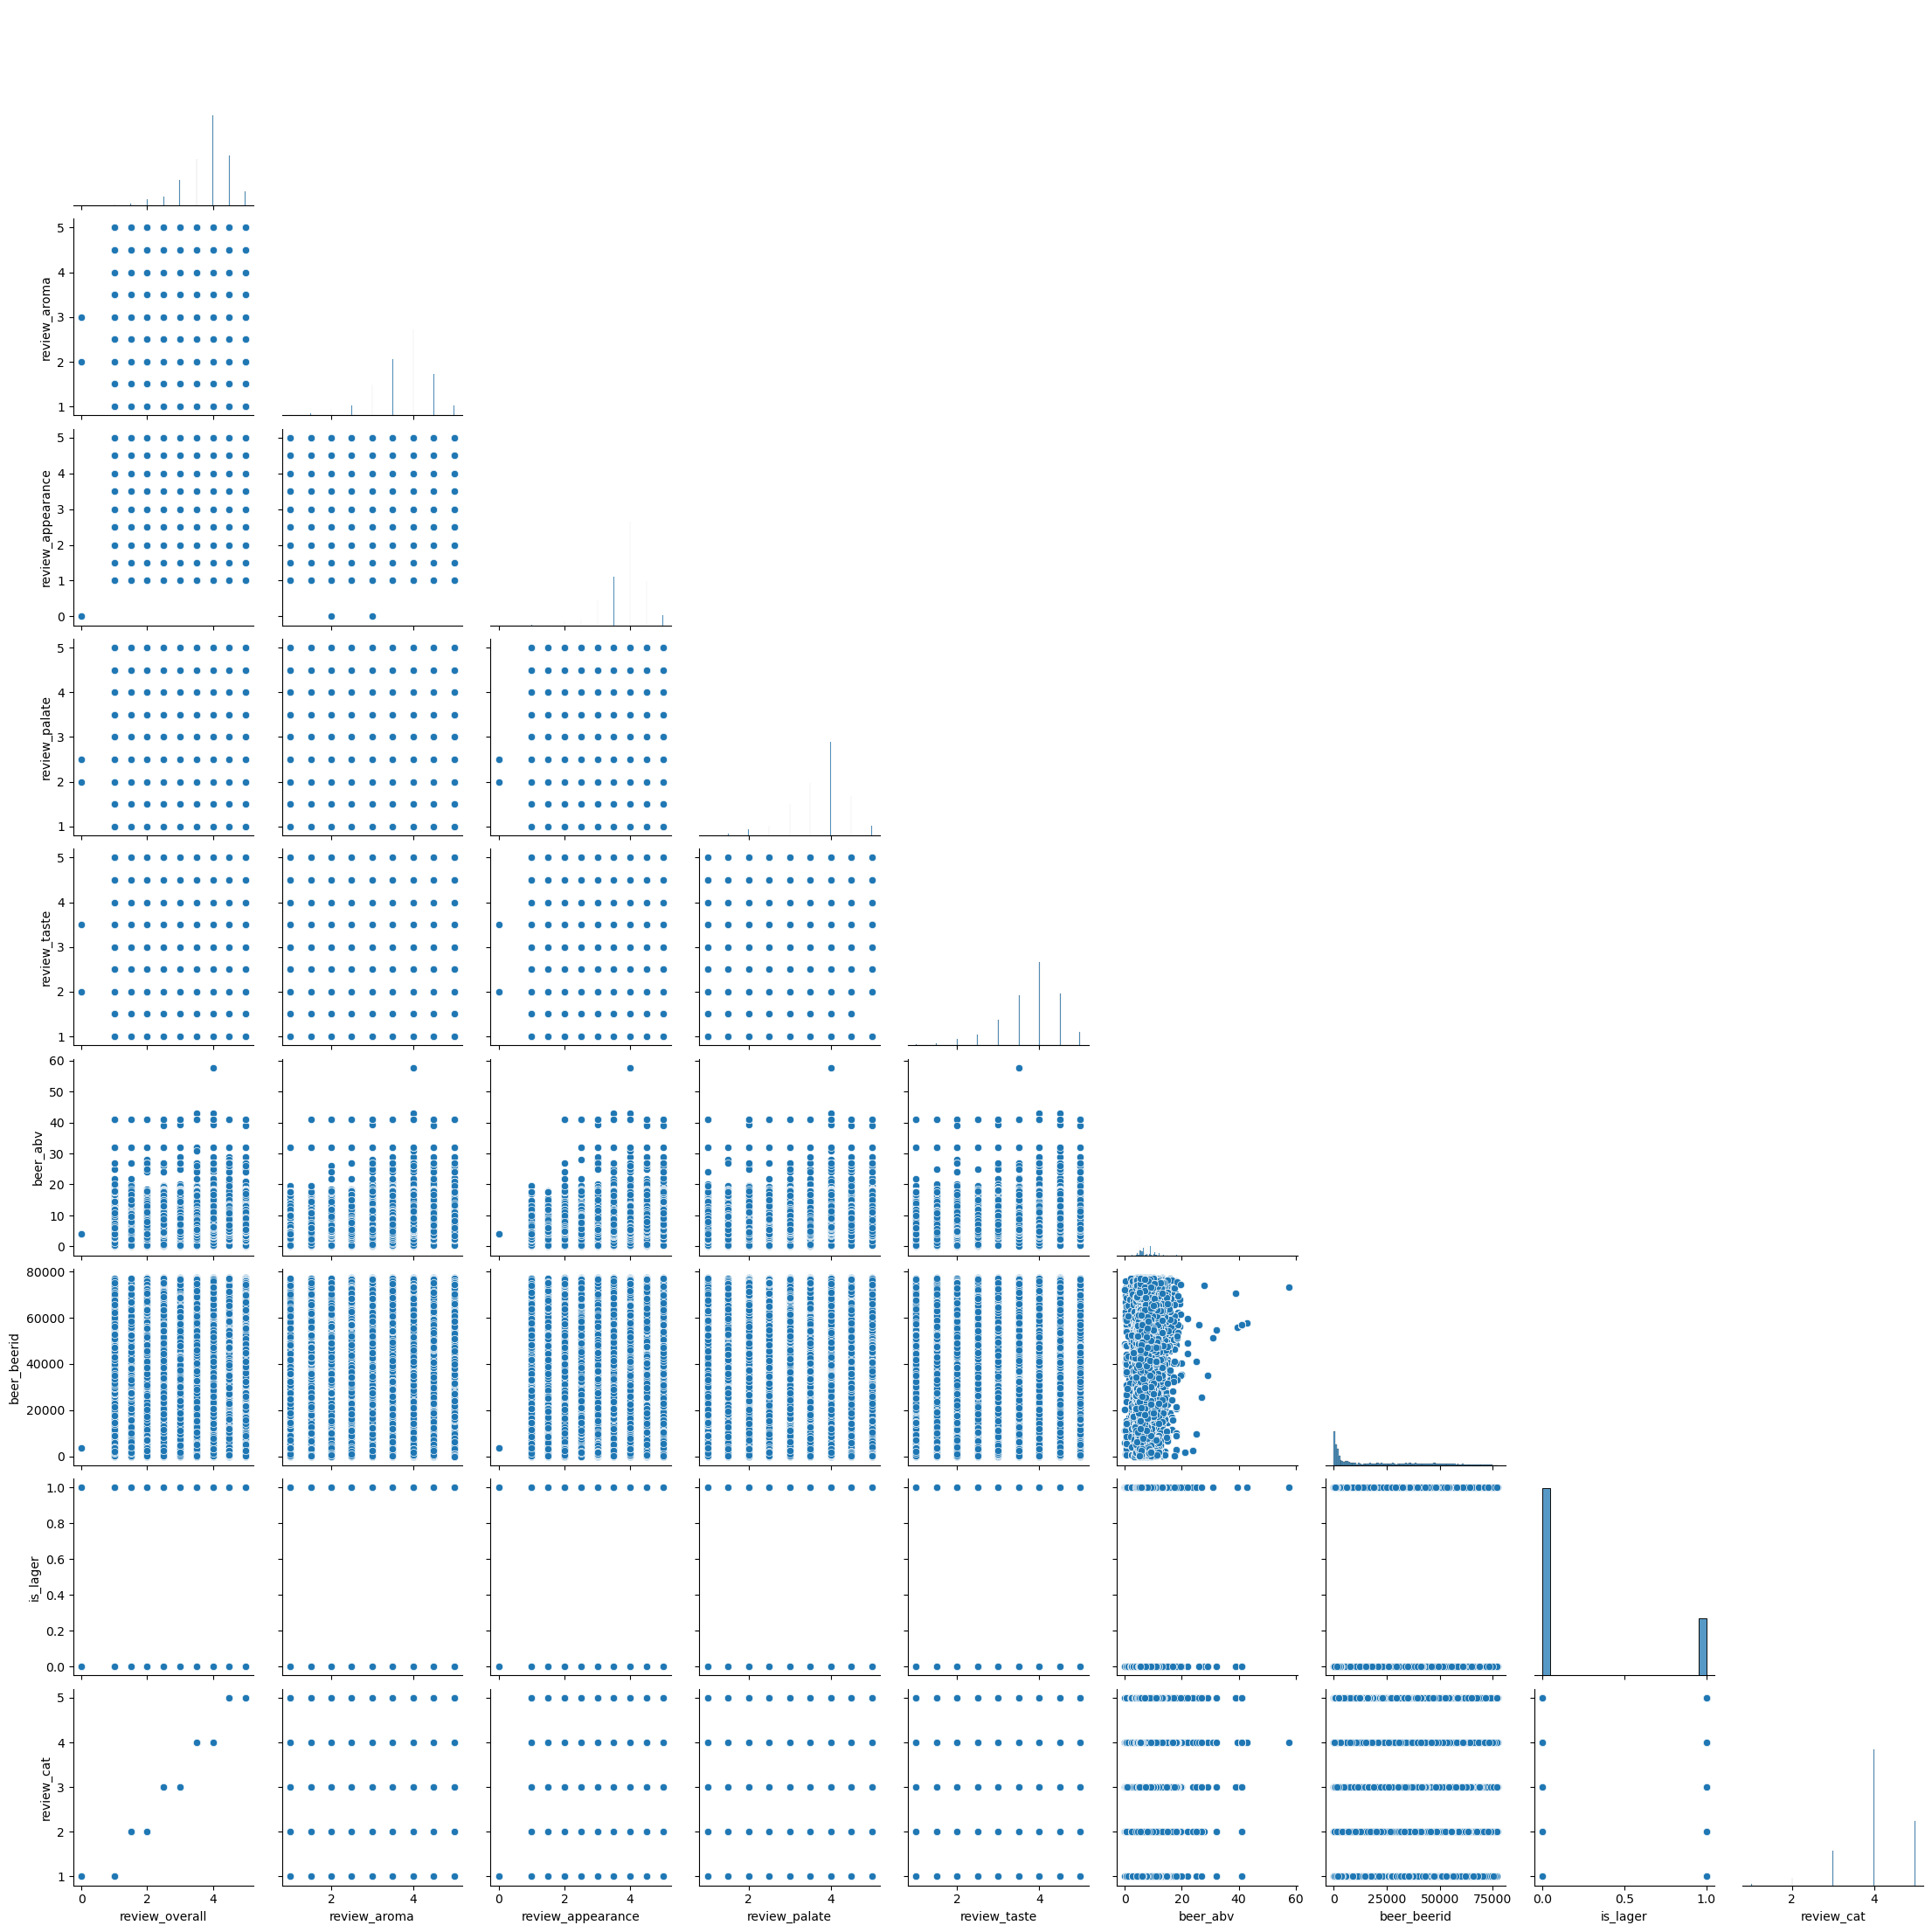

In [53]:
sns.pairplot(data=train, corner=True)

<Axes: >

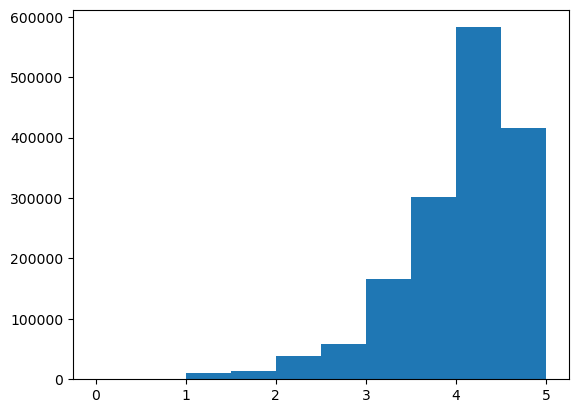

In [55]:
df.review_overall.hist(grid=False)

In [ ]:
# not normally distributed, values are skewed left

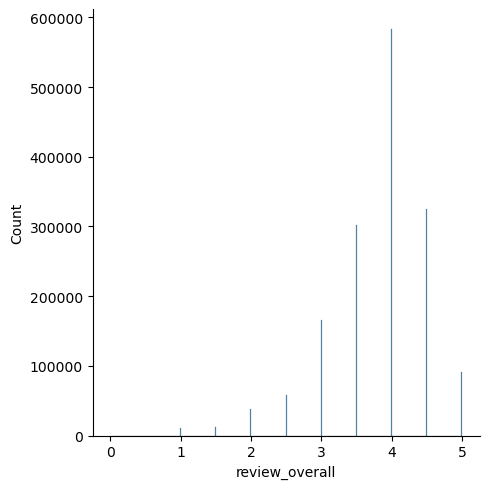

In [56]:
sns.displot(df.review_overall)

### Individual variables and correlations

<Axes: xlabel='is_lager', ylabel='count'>

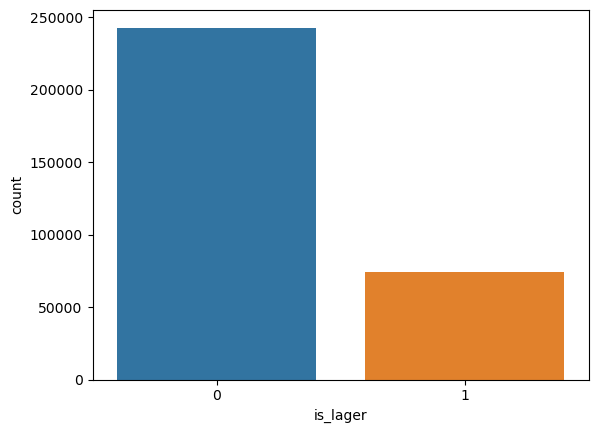

In [57]:
sns.countplot(data=test, x='is_lager')

##### A LOT more ales that lagers in the dataset

In [58]:
train.corr()['review_overall']

/var/folders/_6/0nkpzhxj2_n85fz5s1rk__xr0000gn/T/ipykernel_17350/1378347002.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr()['review_overall']


review_overall       1.000000
review_aroma         0.615964
review_appearance    0.501345
review_palate        0.701654
review_taste         0.789735
beer_abv             0.134201
beer_beerid          0.003829
is_lager            -0.148568
review_cat           0.946736
Name: review_overall, dtype: float64

In [63]:
train.corr()

/var/folders/_6/0nkpzhxj2_n85fz5s1rk__xr0000gn/T/ipykernel_17350/2189804198.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr()


,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid,is_lager,review_cat
review_overall,1.000000,0.615964,0.501345,0.701654,0.789735,0.134201,0.003829,-0.148568,0.946736
review_aroma,0.615964,1.000000,0.561528,0.616999,0.716762,0.324135,0.078003,-0.256708,0.582643
review_appearance,0.501345,0.561528,1.000000,0.566838,0.546760,0.257292,0.054987,-0.222754,0.474215
review_palate,0.701654,0.616999,0.566838,1.000000,0.733904,0.279071,0.045355,-0.193298,0.662421
review_taste,0.789735,0.716762,0.546760,0.733904,1.000000,0.282691,0.030675,-0.201599,0.745108
beer_abv,0.134201,0.324135,0.257292,0.279071,0.282691,1.000000,0.197436,-0.169835,0.128233
beer_beerid,0.003829,0.078003,0.054987,0.045355,0.030675,0.197436,1.000000,-0.094503,0.005085
is_lager,-0.148568,-0.256708,-0.222754,-0.193298,-0.201599,-0.169835,-0.094503,1.000000,-0.141170
review_cat,0.946736,0.582643,0.474215,0.662421,0.745108,0.128233,0.005085,-0.141170,1.000000


* taste is sub category most closely correlated with overall quality
* least correlated is appearance
* lager vs ale category is more highly correlated with overall quality than ABV
* ABV is most highly correlated with aroma
* lager category is most (negatively) correlated with aroma as well

<Axes: xlabel='is_lager', ylabel='review_overall'>

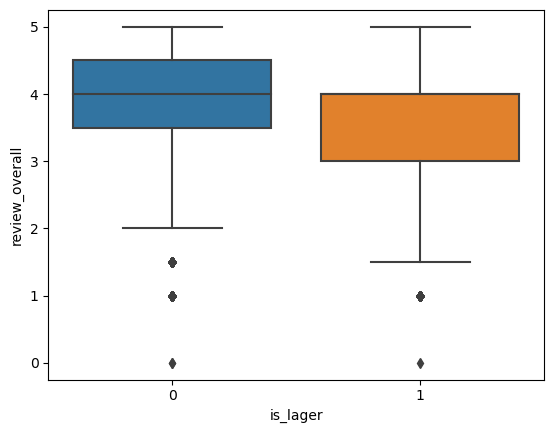

In [59]:
sns.boxplot(data=train, x='is_lager', y='review_overall')


* Ales seem to be rated overall higher in quality than lagers

/var/folders/_6/0nkpzhxj2_n85fz5s1rk__xr0000gn/T/ipykernel_17350/1524494364.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr())


<Axes: >

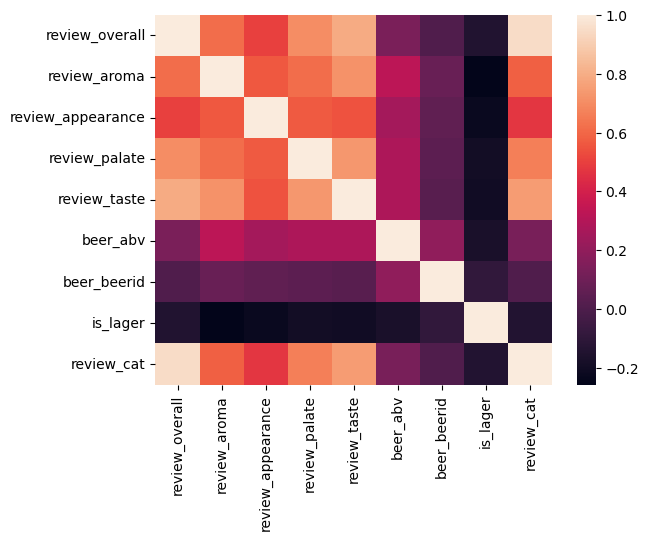

In [60]:
sns.heatmap(train.corr())

In [ ]:
### Multiple Variables

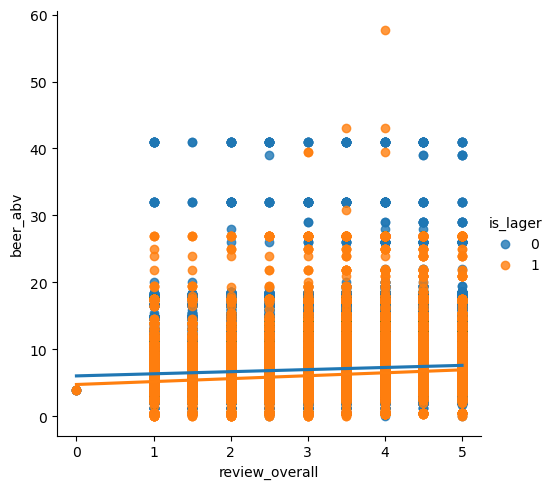

In [61]:
sns.lmplot(x='review_overall', y='beer_abv', data=df, scatter=True, hue='is_lager')
plt.ylim(1,10)

<function matplotlib.pyplot.show(close=None, block=None)>

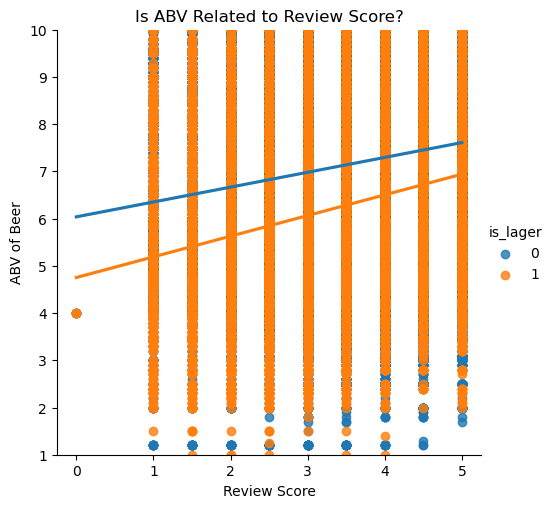

In [68]:
sns.lmplot(x='review_overall', y='beer_abv', data=df, scatter=True, hue='is_lager')
plt.ylabel('ABV of Beer')
plt.xlabel('Review Score')
plt.title('Is ABV Related to Review Score?')
plt.ylim(1,10)
plt.show

* increase in ABV is associated with increase in quality, especially with lagers

<Axes: xlabel='is_lager', ylabel='review_cat'>

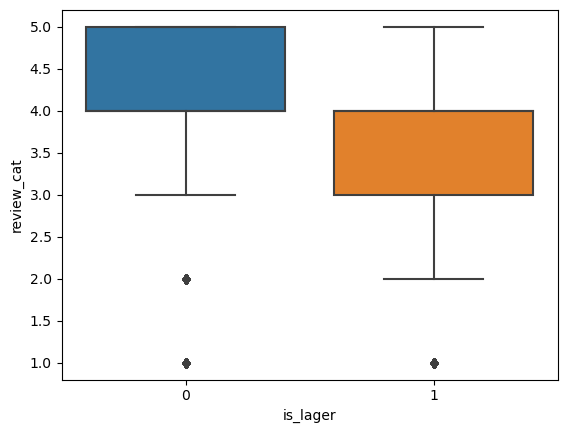

In [62]:
sns.boxplot(data=train, x='is_lager', y='review_cat')

(3.0, 4.25)

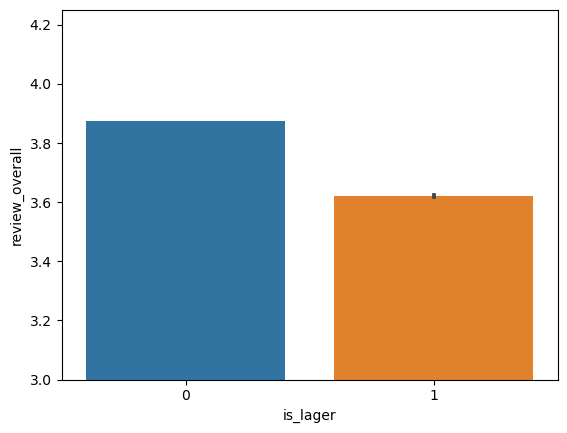

In [69]:
sns.barplot(data=train, x='is_lager', y='review_overall')
plt.ylim(3,4.25)

* roughly .3 difference in score between lagers and ales

### Stats testing

Target variable is heavily skewed, we cannot assume normality
Alpha is set to .05 for all statistical tests

In [70]:
# statistical significant relationship between overall review and lager vs ale? Yes

corr, p = stats.pearsonr(train.review_overall, train.is_lager)
corr, p


(-0.1485678701524495, 0.0)

In [71]:
# statistical significant relationship between overall review and abv? Yes

corr, p = stats.pearsonr(train.review_overall, train.beer_abv)
corr, p

(0.13420092560709818, 0.0)

statistically significant difference in mean overall score between ales and lagers?

Ho: No statistically significant difference between the mean scores of ales and lagers
Ha: There is a statistically significant difference between the mean scores of ales and lagers

Series([], Name: review_overall, dtype: float64)

In [74]:
# independent, one sided mann whitney test measuring statistical significance absent of normal distribution

stats.mannwhitneyu(train[train.is_lager==0].review_overall, 
             train[train.is_lager==1].review_overall, alternative='greater')


MannwhitneyuResult(statistic=95135422064.5, pvalue=0.0)

In [ ]:
# We reject the null hypothesis

# Modeling

We will start with modelingm on only our "objective" (non-review) variables

In [75]:
train.columns.values.tolist()

['review_overall',
 'review_aroma',
 'review_appearance',
 'beer_style',
 'review_palate',
 'review_taste',
 'beer_name',
 'beer_abv',
 'beer_beerid',
 'is_lager',
 'review_cat']

In [76]:
# splits into x and y for features and target variable on train, test, and validate
X_train = train.drop(columns=['review_overall', 'review_aroma', 'review_appearance', 'beer_style', 'review_palate', 'review_taste', 'beer_name', 'beer_beerid', 'review_cat'])
y_train = train.review_cat

X_validate = validate.drop(columns=['review_overall', 'review_aroma', 'review_appearance', 'beer_style', 'review_palate', 'review_taste', 'beer_name', 'beer_beerid', 'review_cat'])
y_validate = validate.review_cat

X_test = test.drop(columns=['review_overall', 'review_aroma', 'review_appearance', 'beer_style', 'review_palate', 'review_taste', 'beer_name', 'beer_beerid', 'review_cat'])
y_test = test.review_cat


In [78]:
y_train.sample(15)

845682     5
828589     2
259155     5
614989     5
1115014    4
692189     4
794873     3
1446757    5
412683     4
496416     4
787260     3
797227     4
1500854    4
931479     5
583604     3
Name: review_cat, dtype: int64

In [79]:
X_train.head()

,beer_abv,is_lager
205023,6.0,0
903828,5.0,0
540460,8.5,0
484475,5.0,0
1269949,5.2,0


## Random Forest

In [95]:
# The mode is a great baseline
baseline = y_train.mode()

# Produce a boolean array with True representing a match between the baseline prediction and reality
matches_baseline_prediction = y_train == 4

baseline_accuracy = matches_baseline_prediction.mean()
print(f"Baseline accuracy: {round(baseline_accuracy, 2)}")

Baseline accuracy: 0.56


In [98]:
# Random Forest Function
for i in range(2, 11):
    # Makes Random Forest Model
    forest = RandomForestClassifier(max_depth=i, random_state=7)

    # Fit the model 
    forest = forest.fit(X_train, y_train)

    # Use model
    # Evaluate on train
    y_predictions = forest.predict(X_train)

    # Produce report on actual y values and this model's predicted y values
    report = classification_report(y_train, y_predictions, output_dict=True)
    print(f"Tree with max depth of {i}")
    print(pd.DataFrame(report))
    print()


/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Tree with max depth of 2
                1        2         3              4         5  accuracy  \
precision     0.0      0.0       0.0       0.557527       0.0  0.557527   
recall        0.0      0.0       0.0       1.000000       0.0  0.557527   
f1-score      0.0      0.0       0.0       0.715913       0.0  0.557527   
support    6577.0  30720.0  134500.0  530748.000000  249423.0  0.557527   

               macro avg   weighted avg  
precision       0.111505       0.310837  
recall          0.200000       0.557527  
f1-score        0.143183       0.399141  
support    951968.000000  951968.000000  



/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Tree with max depth of 3
                1        2         3              4         5  accuracy  \
precision     0.0      0.0       0.0       0.557527       0.0  0.557527   
recall        0.0      0.0       0.0       1.000000       0.0  0.557527   
f1-score      0.0      0.0       0.0       0.715913       0.0  0.557527   
support    6577.0  30720.0  134500.0  530748.000000  249423.0  0.557527   

               macro avg   weighted avg  
precision       0.111505       0.310837  
recall          0.200000       0.557527  
f1-score        0.143183       0.399141  
support    951968.000000  951968.000000  



/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Tree with max depth of 4
                1        2              3              4         5  accuracy  \
precision     0.0      0.0       0.283868       0.559647       0.0  0.557832   
recall        0.0      0.0       0.013227       0.997195       0.0  0.557832   
f1-score      0.0      0.0       0.025276       0.716935       0.0  0.557832   
support    6577.0  30720.0  134500.000000  530748.000000  249423.0  0.557832   

               macro avg   weighted avg  
precision       0.168703       0.352125  
recall          0.202084       0.557832  
f1-score        0.148442       0.403282  
support    951968.000000  951968.000000  



/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Tree with max depth of 5
                1             2              3              4         5  \
precision     0.0      0.334365       0.307374       0.560402       0.0   
recall        0.0      0.010547       0.017108       0.996230       0.0   
f1-score      0.0      0.020449       0.032412       0.717304       0.0   
support    6577.0  30720.000000  134500.000000  530748.000000  249423.0   

           accuracy      macro avg   weighted avg  
precision  0.558183       0.240428       0.366657  
recall     0.558183       0.204777       0.558183  
f1-score   0.558183       0.154033       0.405156  
support    0.558183  951968.000000  951968.000000  

Tree with max depth of 6
                     1             2              3              4  \
precision     0.272973      0.334365       0.311979       0.560759   
recall        0.015357      0.010547       0.018357       0.995844   
f1-score      0.029077      0.020449       0.034674       0.717496   
support    6577.000000  30720.000

None of the models beat baseline. We should consider adding in aroma in the absence of data on hops.

In [99]:
# splits into x and y for features and target variable on train, test, and validate
X_train = train.drop(columns=['review_overall', 'review_appearance', 'beer_style', 'review_palate', 'review_taste', 'beer_name', 'beer_beerid', 'review_cat'])
y_train = train.review_cat

X_validate = validate.drop(columns=['review_overall', 'review_appearance', 'beer_style', 'review_palate', 'review_taste', 'beer_name', 'beer_beerid', 'review_cat'])
y_validate = validate.review_cat

X_test = test.drop(columns=['review_overall', 'review_appearance', 'beer_style', 'review_palate', 'review_taste', 'beer_name', 'beer_beerid', 'review_cat'])
y_test = test.review_cat

In [100]:
y_train.sample(15)

1398087    5
1495052    4
1115122    4
761128     4
1334876    4
166947     4
1002816    4
494466     4
400083     4
458884     3
161546     4
1242094    5
265945     4
1296622    5
974547     4
Name: review_cat, dtype: int64

In [101]:
X_train.head()

,review_aroma,beer_abv,is_lager
205023,4.5,6.0,0
903828,4.0,5.0,0
540460,4.0,8.5,0
484475,4.5,5.0,0
1269949,4.0,5.2,0


In [102]:
for i in range(2, 11):
    # Makes Random Forest Model
    forest = RandomForestClassifier(max_depth=i, random_state=7)

    # Fit the model 
    forest = forest.fit(X_train, y_train)

    # Use model
    # Evaluate on train
    y_predictions = forest.predict(X_train)

    # Produce report on actual y values and this model's predicted y values
    report = classification_report(y_train, y_predictions, output_dict=True)
    print(f"Tree with max depth of {i}")
    print(pd.DataFrame(report))
    print()


/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Tree with max depth of 2
                1        2         3              4         5  accuracy  \
precision     0.0      0.0       0.0       0.557527       0.0  0.557527   
recall        0.0      0.0       0.0       1.000000       0.0  0.557527   
f1-score      0.0      0.0       0.0       0.715913       0.0  0.557527   
support    6577.0  30720.0  134500.0  530748.000000  249423.0  0.557527   

               macro avg   weighted avg  
precision       0.111505       0.310837  
recall          0.200000       0.557527  
f1-score        0.143183       0.399141  
support    951968.000000  951968.000000  



/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Tree with max depth of 3
                1        2              3              4              5  \
precision     0.0      0.0       0.422974       0.578995       0.711257   
recall        0.0      0.0       0.092454       0.974434       0.083649   
f1-score      0.0      0.0       0.151740       0.726384       0.149693   
support    6577.0  30720.0  134500.000000  530748.000000  249423.000000   

           accuracy      macro avg   weighted avg  
precision  0.578253       0.342645       0.568921  
recall     0.578253       0.230107       0.578253  
f1-score   0.578253       0.205563       0.465638  
support    0.578253  951968.000000  951968.000000  



/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Tree with max depth of 4
                1             2              3              4              5  \
precision     0.0      0.431887       0.458576       0.601207       0.583463   
recall        0.0      0.036947       0.144283       0.897970       0.267353   
f1-score      0.0      0.068070       0.219503       0.720216       0.366685   
support    6577.0  30720.000000  134500.000000  530748.000000  249423.000000   

           accuracy      macro avg   weighted avg  
precision  0.592269       0.415027       0.566788  
recall     0.592269       0.269311       0.592269  
f1-score   0.592269       0.274895       0.530824  
support    0.592269  951968.000000  951968.000000  

Tree with max depth of 5
                     1             2              3              4  \
precision     0.818182      0.417107       0.453144       0.622037   
recall        0.015052      0.069368       0.194788       0.844420   
f1-score      0.029561      0.118954       0.272458       0.716367   
support 